<a href="https://colab.research.google.com/github/Mayandza/Projet/blob/main/Scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Advertising.csv')

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


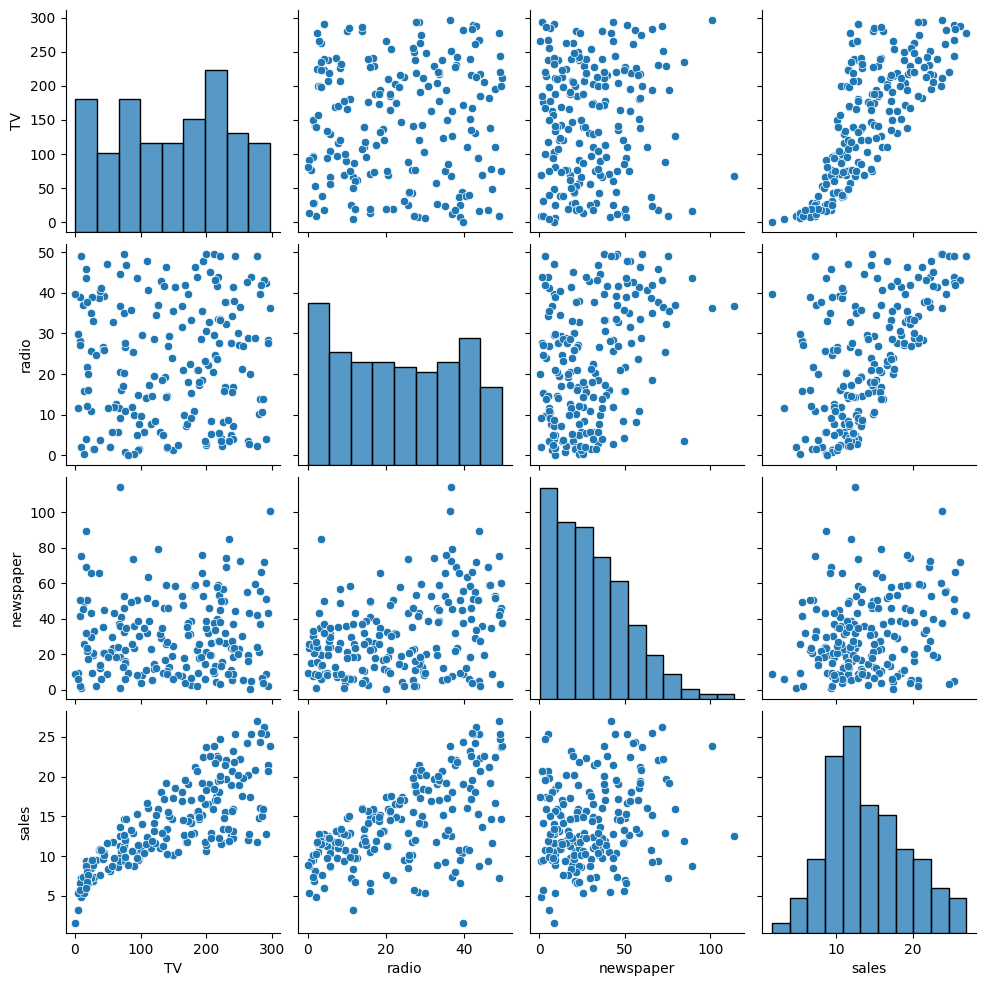

In [9]:
sns.pairplot(df)

<Axes: xlabel='sales', ylabel='TV'>

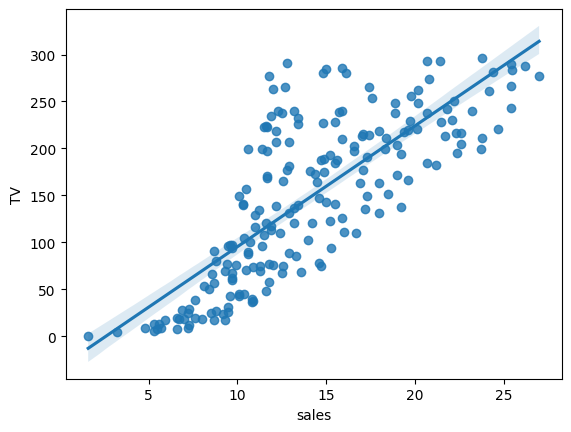

In [10]:
# relation entre tv et ventes

sns.regplot(df, x='sales', y='TV')

<Axes: xlabel='sales', ylabel='radio'>

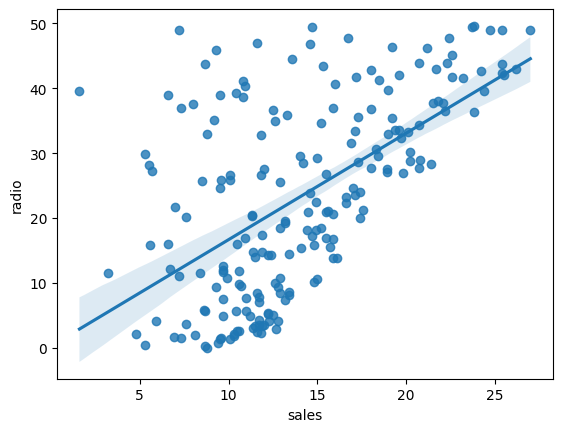

In [11]:
# relation entre Radio et ventes

sns.regplot(df, x='sales', y='radio')

<Axes: xlabel='sales', ylabel='newspaper'>

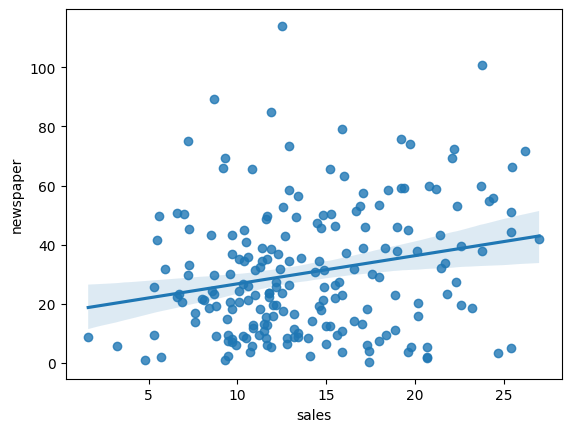

In [12]:
# relation entre newspaper et ventes

sns.regplot(df, x='sales', y='newspaper')

In [13]:
### separation des données en features et en labels

X = df.drop('sales', axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [14]:
y = df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [15]:
## fractionement des données
## la decomposition

from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
len(X_train)

140

In [18]:
len(X_test)

60

In [19]:
len(y_train)

140

In [20]:
len(y_test)

60

In [21]:
### importation du model

from sklearn.linear_model import LinearRegression

In [22]:
model = LinearRegression()

In [23]:
model.fit(X_train, y_train)

LinearRegression()

In [24]:
test_predict = model.predict(X_test)

In [25]:
test_predict

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [26]:
X_test.head()

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2


In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
df['sales'].mean()

14.0225

<Axes: xlabel='sales', ylabel='Count'>

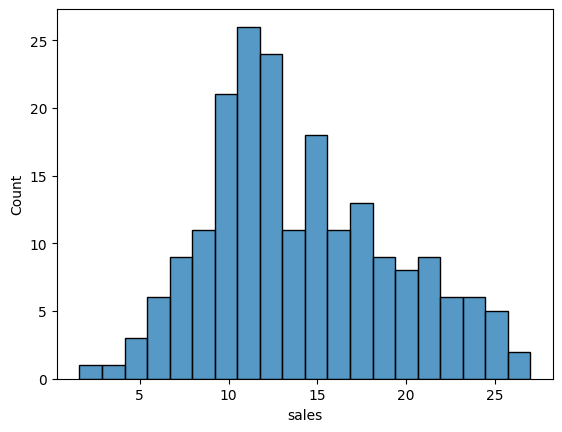

In [29]:
sns.histplot(df, x='sales', bins=20)

In [30]:
mean_absolute_error(y_test, test_predict)

1.213745773614481

In [31]:
np.sqrt(mean_squared_error(y_test, test_predict))

1.5161519375993884

In [32]:
test_residuels = y_test - test_predict

In [33]:
test_residuels

37    -1.041313
109    0.189374
31     0.451111
89    -0.308198
66     0.327143
119   -0.412483
54    -0.089925
74    -0.299540
145    0.524155
142    0.878058
148   -1.505032
112    0.207650
174   -2.225411
55     2.412060
141    0.775434
149    0.118016
25    -3.552290
34     1.810863
170    0.843850
39     1.096888
172   -0.192152
153    0.757859
175    2.313681
61     1.378009
65     1.320379
50    -1.252073
42    -0.769259
129    1.647714
179    0.176840
2     -3.207197
12    -1.577578
133    0.355399
90     1.129731
22    -1.107800
41    -0.214921
32     1.832357
125    1.346067
196    1.421653
158   -3.281056
180   -0.135911
16    -0.510026
186    0.528079
144    1.185301
121   -1.045720
80     0.232893
18     1.216320
78    -3.698066
48    -1.453889
4     -0.339423
15     1.585066
1     -2.097274
43    -1.066159
102   -2.762851
164    0.754630
9     -1.962615
155   -2.308703
36     2.105349
190   -1.824097
33    -1.374000
45    -0.287857
Name: sales, dtype: float64

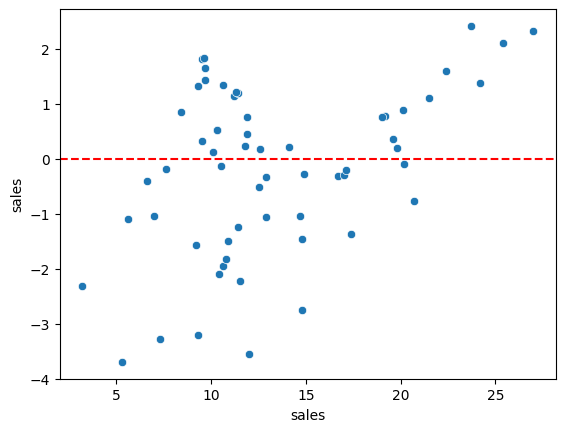

In [34]:
sns.scatterplot(x=y_test, y=test_residuels)
plt. axhline(y=0, color = 'red', ls ='--')

<ipython-input-35-9e78e528df75>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(test_residuels, bins = 25)


<Axes: xlabel='sales', ylabel='Density'>

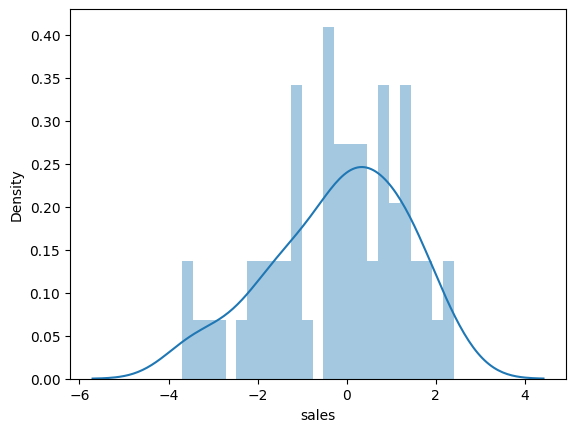

In [35]:
sns.distplot(test_residuels, bins = 25)

In [36]:
## Deploiement du modele

final_model = LinearRegression()

In [37]:
final_model.fit(X,y)

LinearRegression()

In [38]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [39]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [40]:
from joblib import dump, load

In [41]:
dump(final_model,'final_model_sales.joblib' )

['final_model_sales.joblib']

In [42]:
model = load('final_model_sales.joblib')

In [44]:
## prediction avec notre modele entrainé

X.shape

(200, 3)

In [48]:
# tv 149 unités, radion 22, et journaux 12. Ventes?

ads_value = [[149,22,12]]
X_cols = X.columns


In [50]:
compagne = pd.DataFrame(data =ads_value, columns=X_cols )
compagne

,TV,radio,newspaper
0,149,22,12


In [51]:
model.predict(compagne)

array([13.893032])